## LDA Setup
First half of this notebook will just be me figuring out / setting up LDA and our Preprocessor. The second half will look into metrics (Coherence & Perplexity)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import gensim
import gensim.corpora as corpora
from Preprocessing import Preprocessor
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

C:\Users\kajan\AppData\Local\Programs\Python\Python310\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [2]:
df = pd.read_csv('..\\Datasets\\KhanAcademy\\Humanities.csv').dropna()
preprocessor = Preprocessor(1)

In [3]:
df['course'].nunique() #Good starting place for num_topics?

10

In [4]:
intro_tags = {"NARRATOR:","[Narrator]","[Instructor]","[Voiceover]"}

def remove_intro_tags(text):
    return ' '.join(word for word in text.split() if word not in intro_tags)

df['transcript'] = df['transcript'].apply(remove_intro_tags)

In [5]:
%%time
texts = df['transcript']
doc_list = []

for doc in texts:
    doc_list.append(preprocessor.clean(doc))

CPU times: total: 2min 34s
Wall time: 2min 35s


In [6]:
%%time
temp = doc_list
words = corpora.Dictionary(temp)
words.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
corpus = [words.doc2bow(doc) for doc in temp]

CPU times: total: 547 ms
Wall time: 543 ms


***

In [19]:
%%time
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=words,
                                           num_topics=10,
                                           random_state=2,
                                           update_every=1,
                                           passes=15,
                                           alpha='auto')

CPU times: total: 43.4 s
Wall time: 43.5 s


In [20]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, words, mds='mmds', R=10)

C:\Users\kajan\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [21]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.001446 -0.094144       1        1  15.407959
8     -0.080028  0.229883       2        1  14.561262
2     -0.024441  0.082016       3        1  12.853766
7      0.112275  0.103367       4        1  11.791496
3      0.139441 -0.190833       5        1  11.042995
9     -0.176661 -0.084613       6        1   8.808147
5     -0.151383 -0.198636       7        1   7.196032
1     -0.199351  0.114990       8        1   6.819835
6      0.175073 -0.060968       9        1   5.828603
0      0.206522  0.098939      10        1   5.689905, topic_info=                  Term        Freq       Total Category  logprob  loglift
1217           slavery  821.000000  821.000000  Default  10.0000  10.0000
2358         voiceover  646.000000  646.000000  Default   9.0000   9.0000
2650              beth  473.000000  473.000000  Default   8.0000   8.0000
1910  the constitution  589.000000  589.000000  Default   7.0000   7.0000
1919              vote  752.000000  752.000000  Default   6.0000   6.0000
...                ...         ...         ...      ...      ...      ...
1157      the americas   89.195954  179.264648  Topic10  -4.9715   2.1684
179              begin  153.035055  799.780251  Topic10  -4.4317   1.2128
113               live  150.379203  915.090674  Topic10  -4.4492   1.0606
29                find  139.047377  778.526205  Topic10  -4.5275   1.1439
359               grow  120.249712  491.942787  Topic10  -4.6728   1.4577

[245 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
2359      3  0.047689     - voiceover
2359      6  0.265694     - voiceover
2359      7  0.061314     - voiceover
2359      9  0.606327     - voiceover
2359     10  0.006813     - voiceover
...     ...       ...             ...
120      10  0.236862            year
2681      4  0.987447  your character
1635      4  0.987447      your story
2670      5  0.988164          zucker
2670     10  0.007486          zucker

[1081 rows x 3 columns], R=10, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 3, 8, 4, 10, 6, 2, 7, 1])

In [9]:
#plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(3, 25))))
#plt.show()

In [22]:
lda_model.show_topics()

[(0,
  '0.021*"year" + 0.013*"human" + 0.012*"england" + 0.012*"begin" + 0.012*"live" + 0.011*"native americans" + 0.011*"find" + 0.009*"grow" + 0.009*"agriculture" + 0.008*"virginia"'),
 (1,
  '0.042*"slavery" + 0.020*"the civil war" + 0.015*"the united states" + 0.013*"the south" + 0.010*"the north" + 0.010*"vote" + 0.009*"independence" + 0.008*"the right" + 0.008*"african americans" + 0.007*"the revolution"'),
 (2,
  '0.017*"the united states" + 0.012*"work" + 0.010*"kind" + 0.010*"change" + 0.008*"thing" + 0.007*"the government" + 0.007*"maybe" + 0.007*"money" + 0.007*"spend" + 0.006*"yeah"'),
 (3,
  '0.019*"beth" + 0.015*"steven" + 0.010*"create" + 0.008*"see" + 0.008*"the figure" + 0.008*"a sense" + 0.007*"paint" + 0.007*"represent" + 0.007*"the way" + 0.007*"christ"'),
 (4,
  '0.011*"able" + 0.009*"china" + 0.007*"eventually" + 0.007*"control" + 0.007*"europe" + 0.007*"the world" + 0.007*"today" + 0.006*"rome" + 0.006*"trade" + 0.006*"conquer"'),
 (5,
  '0.020*"able" + 0.017*"ge

## Model Evaluation
**Perplexity**: how "surprised" the model is when given new data (lower = better)  
**Coherence**: metric of the "quality" of the learned topics (higher = better, 0 < x < 1, anything above 0.7 is unlikely)  
  
Will probably want to grid-seach parameters like num_topics

In [7]:
from gensim.models.coherencemodel import CoherenceModel

In [29]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus, total_docs=len(df)))
coherence_model_lda = CoherenceModel(model=lda_model, texts=temp, dictionary=words, coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())


Perplexity:  -6.985846838923681

Coherence Score:  0.46110971791875555


In [38]:
#Crude num_topics search for now
coherence_scores = []
perplexities = []
for i in range(2,51):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=words,
                                           num_topics=i,
                                           random_state=2,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto')
    coherence_model_lda = CoherenceModel(model=lda_model, texts=temp, dictionary=words, coherence='c_v')
    coherence_scores.append(coherence_model_lda.get_coherence())
    perplexities.append(lda_model.log_perplexity(corpus, total_docs=len(df)))

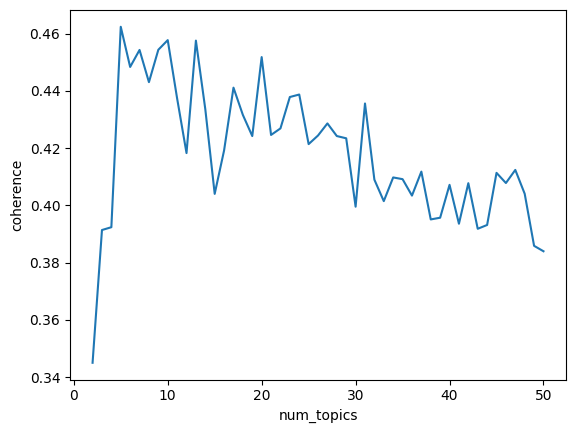

In [39]:
x = range(2,51)
plt.plot(x, coherence_scores)
plt.xlabel('num_topics')
plt.ylabel('coherence')
plt.show()

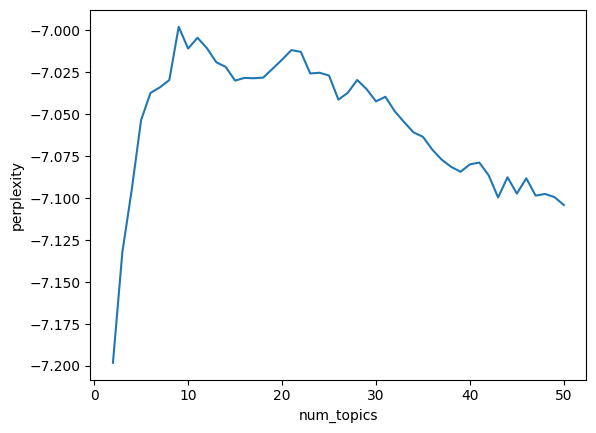

In [40]:
plt.plot(x, perplexities)
plt.xlabel('num_topics')
plt.ylabel('perplexity')
plt.show()

### More Extensive Grid-Search

In [8]:
topics = range(2,31)
alphas = ['symmetric','asymmetric','auto']
betas = ['symmetric', 'auto']

results = []

for n in tqdm(topics):
    for a in alphas:
        for b in betas:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                        id2word=words,
                                                        num_topics=n,
                                                        random_state=2,
                                                        update_every=1,
                                                        passes=10,
                                                        alpha=a,
                                                        eta=b)
            coherence_model_lda = CoherenceModel(model=lda_model, texts=temp, dictionary=words, coherence='c_v')
            score = coherence_model_lda.get_coherence()
            results.append((score,(n,a,b)))

100%|███████████████████████████████████████████████████████████████████████████████| 29/29 [1:11:37<00:00, 148.19s/it]


In [9]:
# Best model
max(results,key=lambda x:x[0])

(0.48639637902160804, (7, 'symmetric', 'symmetric'))

In [12]:
sorted(results,key=lambda x:-x[0])[0:10]

[(0.48639637902160804, (7, 'symmetric', 'symmetric')),
 (0.48639637902160804, (7, 'symmetric', 'auto')),
 (0.48639637902160804, (7, 'auto', 'symmetric')),
 (0.48639637902160804, (7, 'auto', 'auto')),
 (0.48240747609261486, (6, 'asymmetric', 'symmetric')),
 (0.48240747609261486, (6, 'asymmetric', 'auto')),
 (0.4815369730354943, (11, 'asymmetric', 'symmetric')),
 (0.4815369730354943, (11, 'asymmetric', 'auto')),
 (0.481349715116978, (9, 'asymmetric', 'symmetric')),
 (0.481349715116978, (9, 'asymmetric', 'auto'))]

Ideally would've liked to be above 0.5 coherence score, but this will do for now. If further tuning is needed we can quickly revisit this.